<a href="https://colab.research.google.com/github/briandk/2020-virtual-program-in-data-science/blob/master/heights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

from plotnine import *

In [2]:
heights = pd.read_csv("https://github.com/briandk/2020-virtual-program-in-data-science/raw/master/data/heights.csv")

Let's first get an overall sense of the data.

In [3]:
heights

,earn,height,sex,ed,age,race
0,50000.0,74.424439,male,16,45,white
1,60000.0,65.537543,female,16,58,white
2,30000.0,63.629198,female,16,29,white
3,50000.0,63.108562,female,16,91,other
4,51000.0,63.402484,female,17,39,white
...,...,...,...,...,...,...
1187,19000.0,72.165733,male,12,29,white
1188,15000.0,61.135800,female,18,82,white
1189,8000.0,63.664164,female,12,33,white
1190,60000.0,71.925836,male,12,50,white


What if we look at the distributions of height by sex?*

\* - Sex and gender are *not* the same thing. And there are many discussions to be had about their differences. Suffice it to say that this data assumes sex is binary and reports it as such. But you don't have to. [**Gender is a text field**][1].

[1]: http://www.sarahmei.com/blog/2010/11/26/disalienation/

/usr/local/lib/python3.6/dist-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 18'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)


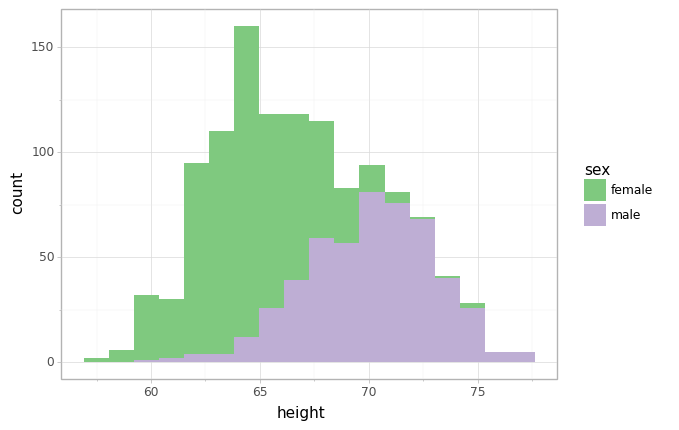

<ggplot: (8789166971975)>

In [14]:
(
    ggplot(
        aes(x = 'height',
            fill = 'sex'),
        data = heights
    ) +
    geom_histogram() +
    scale_fill_brewer(type='qual') +
    theme_light()
)

Another way of looking at distributions is to look at a smoothed kernel density estimate, which is the continuous analog of a histogram. We're doing a similar process of binning, we just get a less jagged, more smooth distribution

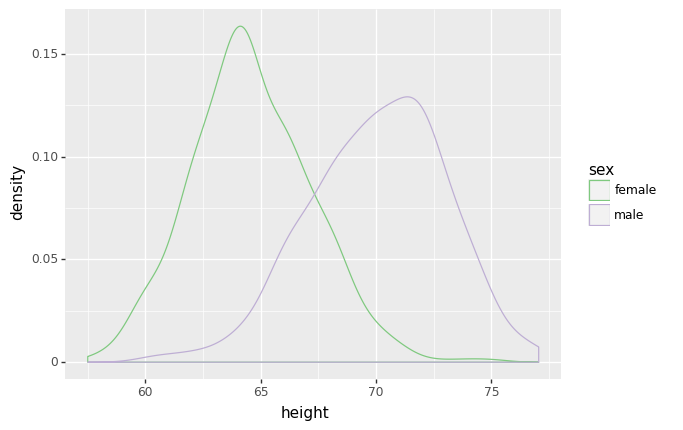

<ggplot: (-9223363247687986183)>

In [16]:
(
    ggplot(
        aes(x = 'height',
            color = 'sex'),
        data = heights
    ) +
    geom_density() +
    scale_color_brewer(type='qual')
)

The distributions definitely overlap. It almost looks as if there are more females in this dataset than males. 

In [24]:
heights.groupby('sex').count()

,earn,height,ed,age,race
sex,,,,,
female,687,687,687,687,687
male,505,505,505,505,505


Looks like we were right! There are about 182 more women represented in this dataset than there are men. Let's get some summary statistics on the two groups.

In [26]:
heights[['sex', 'height']].groupby('sex').describe()

height                       ...                                 
        count       mean       std  ...        50%        75%        max
sex                                 ...                                 
female  687.0  64.605603  2.612435  ...  64.372563  66.276499  75.156660
male    505.0  70.057058  2.940739  ...  70.277548  72.085957  77.051282

[2 rows x 8 columns]

Both of these distributions are skewed right, which means they have a longer tail to the right than they do to the left. For that reason, we don't necessarily expect the mean and mode to be the same. Rather, the mean "chases" the outlier values---which in this case are the super tall people.

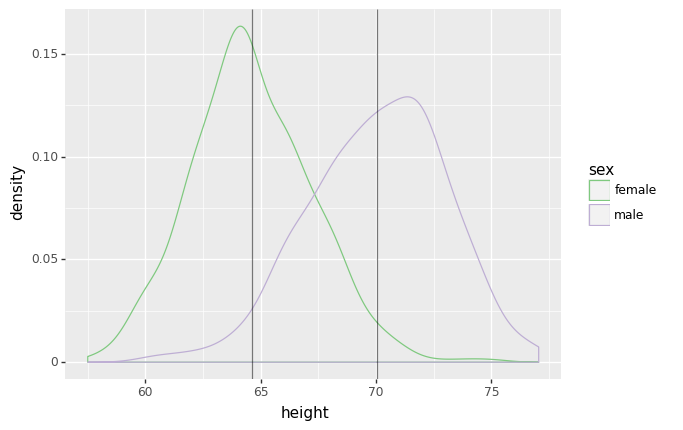

<ggplot: (-9223363247688333003)>

In [36]:
mean_female_height = heights[heights['sex'] == 'female']['height'].mean()
mean_male_height = heights[heights['sex'] == 'male']['height'].mean()

(
    ggplot(
        aes(x = 'height',
            color = 'sex'),
        data = heights
    ) +
    geom_density() +
    scale_color_brewer(type='qual') +
    geom_vline(xintercept = mean_male_height, alpha = 0.5) +
    geom_vline(xintercept = mean_female_height, alpha = 0.5)
)


Well, look at that. I was wrong! The mean male height actually chases the smaller height outliers, pushing it to the left of the mode (peak) of the distribution. Thus, the male height distribution is what we would call "skewed *left*". But the female mean height is higher than the mode, which means the female height distribution is skewed *right*.

Another thing we might be intereested in is how age breaks down by sex.

In [40]:
heights[['sex', 'age']].groupby('sex').describe()

age                                                    
        count       mean        std   min   25%   50%   75%   max
sex                                                              
female  687.0  42.259098  15.931426  18.0  30.0  39.0  51.0  91.0
male    505.0  40.180198  15.716524  18.0  28.0  37.0  50.0  91.0

Let's try visualizing the age distributions:

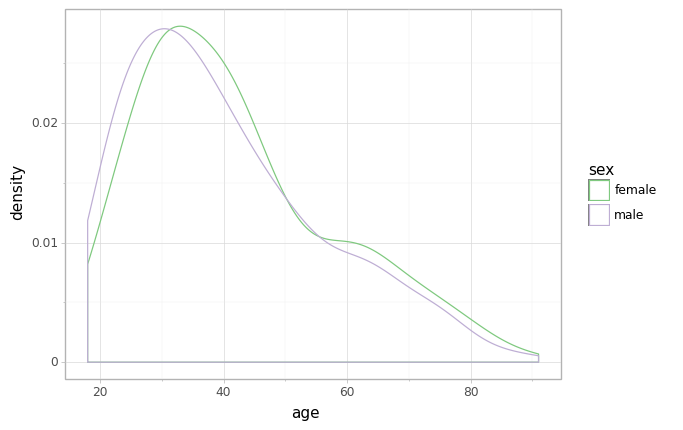

<ggplot: (8789167007338)>

In [43]:
(
    ggplot(
        aes(
            x = 'age',
            color = 'sex'
        ), data = heights
    ) +
    geom_density() +
    scale_color_brewer(type = 'qual', palette = 1) +
    theme_light()
)

Well look at that! The distributions are definitely skewed right. Moreover, there's this hard cutoff on the left side of each distribution. That cutoff looks to be right at age 18, which would make sense: children under the age of 18 probably weren't allowed to participate in the study.